In [2]:
import pandas as pd
import numpy as np 
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

años = ["2018", "2019", "2020", "2021", "2022", "2023", "2024"]
dataframes = {}
for a in años:
    dataframes[a] = pd.read_csv(filepath_or_buffer=f'./{a}.csv', 
                    delimiter=';', 
                    decimal=',',
                    header=0)

In [3]:
#magnitudes = [7, 8, 10, 11, 12, 14, 22]
magnitudes = [8, 14, 10]
for a in dataframes:
    df = dataframes[a]
    dataframes[a] = df[df.magnitud.isin(magnitudes)]
   
dataframes["2022"]


,provincia,municipio,estacion,magnitud,punto_muestreo,ano,mes,dia,h01,v01,...,h20,v20,h21,v21,h22,v22,h23,v23,h24,v24
3,28,102,1,8,28102001_8_8,2022,1,1,8.0,V,...,16.0,V,15.0,V,12.0,V,10.0,V,9.0,V
4,28,102,1,10,28102001_10_49,2022,1,1,5.0,V,...,9.0,V,7.0,V,6.0,V,5.0,V,6.0,V
6,28,102,1,14,28102001_14_6,2022,1,1,59.0,V,...,49.0,V,50.0,V,52.0,V,54.0,V,56.0,V
8,28,120,1,8,28120001_8_8,2022,1,1,1.0,V,...,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V
10,28,120,1,10,28120001_10_49,2022,1,1,1.0,V,...,1.0,V,2.0,V,2.0,V,1.0,V,1.0,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58282,28,9,1,8,28009001_8_8,2022,12,31,12.0,V,...,39.0,V,22.0,V,18.0,V,19.0,V,13.0,V
58285,28,9,1,14,28009001_14_6,2022,12,31,50.0,V,...,34.0,V,36.0,V,48.0,V,39.0,V,47.0,V
58289,28,92,5,8,28092005_8_8,2022,12,31,19.0,V,...,89.0,V,83.0,V,78.0,V,73.0,V,71.0,V
58290,28,92,5,10,28092005_10_49,2022,12,31,23.0,V,...,46.0,V,50.0,V,47.0,V,44.0,V,54.0,V


In [4]:
#est = [(5, 2), (6, 4), (13, 2), (14, 2), (16, 1), (45, 2), (49, 3),
#       (58, 4), (65, 14), (67, 1), (74, 7), (80, 3), (92, 5), (102, 1),
#       (120, 1), (123, 2), (133, 2), (148, 4), (171, 1)]

est = [(74,7), (148,4), (67,1)]
#est = [(74,7)]

for a in dataframes:
    df = dataframes[a]
    dataframes[a] = df[df.apply(lambda row: (row['municipio'], row['estacion']) in est, axis=1)]

#dataframes["2020"]
   

Quitamos las columnas innecesarias

In [5]:
for a in dataframes:
    df = dataframes[a]
    dataframes[a] = df.drop(['provincia', 'punto_muestreo'], axis = 1)

dataframes["2020"]

,municipio,estacion,magnitud,ano,mes,dia,h01,v01,h02,v02,...,h20,v20,h21,v21,h22,v22,h23,v23,h24,v24
34,148,4,8,2020,1,1,42.0,V,41.0,V,...,83.0,V,53.0,V,55.0,V,48.0,V,39.0,V
36,148,4,10,2020,1,1,NaN,N,NaN,N,...,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N
38,148,4,14,2020,1,1,5.0,V,4.0,V,...,6.0,V,5.0,V,5.0,V,4.0,V,4.0,V
128,67,1,8,2020,1,1,27.0,V,28.0,V,...,37.0,V,33.0,V,32.0,V,29.0,V,24.0,V
129,67,1,10,2020,1,1,25.0,V,41.0,V,...,42.0,V,38.0,V,37.0,V,33.0,V,32.0,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58529,67,1,10,2020,12,31,22.0,V,23.0,V,...,35.0,V,21.0,V,15.0,V,7.0,V,14.0,V
58531,67,1,14,2020,12,31,33.0,V,34.0,V,...,37.0,V,41.0,V,70.0,V,69.0,V,60.0,V
58538,74,7,8,2020,12,31,18.0,V,11.0,V,...,15.0,V,13.0,V,9.0,V,9.0,V,15.0,V
58540,74,7,10,2020,12,31,13.0,V,8.0,V,...,5.0,V,5.0,V,5.0,V,3.0,V,3.0,V


Limpiamos la base de datos 

In [6]:
str_val = [f'v{str(i).zfill(2)}' for i in range(1, 25)]
str_horas = [f'h{str(i).zfill(2)}' for i in range(1, 25)]

#Sustituimos los valores no válidos y Nan por la media de la concentración para cada hora y magnitud 
def limpia_df(df):
    for m in magnitudes:
        for i in range(0,24): 
            val = str_val[i]
            hora = str_horas[i]
            #Cambiamos valores no válidos con magnitud m 
            df_val = df[(df[val] == "V") & (df["magnitud"] == m)]

            ind_v = df.index[(df[val] == 'N') & (df["magnitud"] == m)].tolist()

            df.loc[ind_v, val] = "V"
            df.loc[ind_v, hora] = df_val[hora].mean()
            #Sustituimos los valores Nan 
            ind_nan = df.index[(df[hora] == np.NaN) & (df["magnitud"] == m)].tolist() 
            df.loc[ind_nan, hora] = df_val[hora].mean()
    

for a in años:
    df = dataframes[a]
    limpia_df(df)

In [7]:
#Transformamos los dataframes para que tengan la forma municipio, estacion, magnitud, año, mes, dia 
#y normalizamos los datos. 
def transf_df(df):  
    df_unico = pd.melt(df, id_vars=['municipio', 'estacion', 'magnitud', 'ano', 'mes', 'dia'],
                      value_vars=str_horas, var_name='hora', value_name='valor')
    df_unico['hora_num'] = df_unico['hora'].str[1:].astype(int)
    df_unico.drop("hora", axis = 1, inplace=True)

    return df_unico

for a in años:
    df = dataframes[a]
    dataframes[a] = transf_df(df)

In [8]:
#Concatenamos los datos de cada año en un solo Dataframe    
l_df = []
for a in años:
    df = dataframes[a]
    l_df.append(df)

df_total = pd.concat(l_df, ignore_index=True)


#Creamos una columna para cada contaminante 
df_total = df_total.pivot_table(index=['municipio', 'estacion', 'ano', 'mes', 'dia', 'hora_num'],
                         columns='magnitud',
                         values='valor') 

df_total.columns = [f'{col}' for col in df_total.columns]
df_total = df_total.reset_index()

#Ponemos como índice la fecha 
df_total = df_total.rename(columns={'ano': 'year', 'mes': 'month', 'dia': 'day'})
df_total['fecha'] = pd.to_datetime(df_total[['year', 'month', 'day']]) + pd.to_timedelta(df_total['hora_num'] - 1, unit='h')
#df_total = df_total.sort_values(by='fecha')
df_total = df_total.rename(columns={'year': 'ano', 'month': 'mes', 'day': 'dia'})
df_total = df_total.set_index('fecha')
df_total.sort_index(inplace=True)


In [9]:
df_total

,municipio,estacion,ano,mes,dia,hora_num,8,10,14
fecha,,,,,,,,,
2018-01-01 00:00:00,67,1,2018,1,1,1,2.0,1.0,86.0
2018-01-01 00:00:00,74,7,2018,1,1,1,71.0,28.0,12.0
2018-01-01 00:00:00,148,4,2018,1,1,1,43.0,61.0,31.0
2018-01-01 01:00:00,67,1,2018,1,1,2,5.0,1.0,80.0
2018-01-01 01:00:00,74,7,2018,1,1,2,32.0,30.0,48.0
...,...,...,...,...,...,...,...,...,...
2024-05-31 22:00:00,67,1,2024,5,31,23,10.0,19.0,71.0
2024-05-31 22:00:00,74,7,2024,5,31,23,12.0,8.0,81.0
2024-05-31 23:00:00,74,7,2024,5,31,24,8.0,8.0,79.0


In [10]:
# Creamos un diccionario con los DataFrames de cada ciudad 
df_dict = {}

for municipio, estacion in est:
    df_estacion = df_total[(df_total['municipio'] == municipio) & (df_total['estacion'] == estacion)]
    
    df_key = f'({municipio},{estacion})'
    df_dict[df_key] = df_estacion 

# Mostrar dataframes 
for key, value in df_dict.items():
    print(f"DataFrame para {key}:")
    print(value, "\n")

DataFrame para (74,7):
                     municipio  estacion   ano  mes  dia  hora_num     8  \
fecha                                                                      
2018-01-01 00:00:00         74         7  2018    1    1         1  71.0   
2018-01-01 01:00:00         74         7  2018    1    1         2  32.0   
2018-01-01 02:00:00         74         7  2018    1    1         3  29.0   
2018-01-01 03:00:00         74         7  2018    1    1         4  14.0   
2018-01-01 04:00:00         74         7  2018    1    1         5  13.0   
...                        ...       ...   ...  ...  ...       ...   ...   
2024-05-31 19:00:00         74         7  2024    5   31        20  21.0   
2024-05-31 20:00:00         74         7  2024    5   31        21  23.0   
2024-05-31 21:00:00         74         7  2024    5   31        22  17.0   
2024-05-31 22:00:00         74         7  2024    5   31        23  12.0   
2024-05-31 23:00:00         74         7  2024    5   31        2

Versión 2 del diccionario de dataframes, donde cada fila contiene el valor diario calculado como la media de las concentraciones de las 24 horas.

In [ ]:
# Creamos un diccionario con los DataFrames de cada ciudad 
df_dict = {}

for municipio, estacion in est:
    df_estacion = df_total[(df_total['municipio'] == municipio) & (df_total['estacion'] == estacion)]
    df_est_diario = df_estacion.resample('D').mean()
    df_key = f'({municipio},{estacion})'
    df_dict[df_key] = df_est_diario


# Mostrar dataframes 
for key, value in df_dict.items():
    print(f"DataFrame para {key}:")
    print(value, "\n")

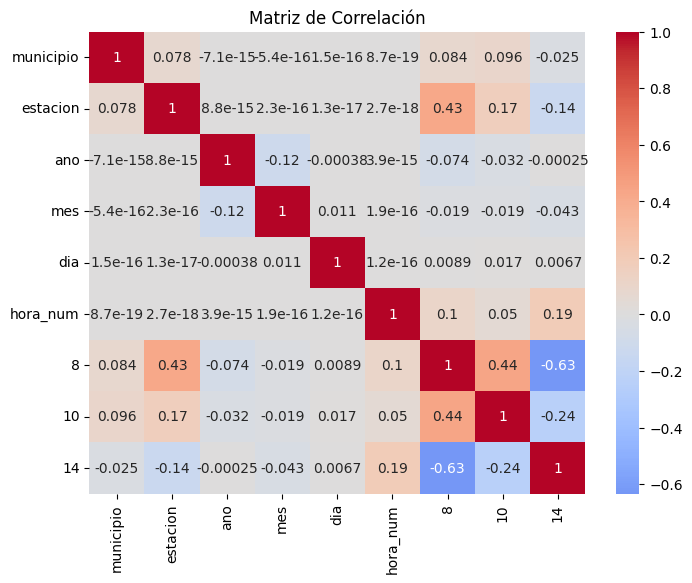

In [28]:
correlation_matrix = df_total.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

In [259]:
df_total
df_total = df_total.rename(columns={'ano': 'year', 'mes': 'month', 'dia': 'day'})
df_total['fecha'] = pd.to_datetime(df_total[['year', 'month', 'day']]) + pd.to_timedelta(df_total['hora_num'] - 1, unit='h')
#df_total = df_total.sort_values(by='fecha')
df_total = df_total.set_index('fecha')
df_total.sort_index(inplace=True)

# Crear una nueva columna 'seconds' que contiene los segundos desde el inicio del día
#df_total['seconds'] = df_total['fecha'].dt.hour * 3600 + df_total['fecha'].dt.minute * 60 + df_total['fecha'].dt.second
date_time = pd.to_datetime(df_total.pop('fecha'))
timestamp_s = date_time.map(pd.Timestamp.timestamp)
df_total['segundos'] = timestamp_s
df_total['seg_nor'] = df_total['segundos'] - df_total['segundos'].iloc[0]
df_total.drop(columns=["year", "month","day","hora_num","segundos"],inplace=True)

In [9]:
df_total

,municipio,estacion,ano,mes,dia,hora_num,8,10,14
0,67,1,2018,1,1,1,2.0,1.0,86.0
1,67,1,2018,1,1,2,5.0,1.0,80.0
2,67,1,2018,1,1,3,5.0,5.0,75.0
3,67,1,2018,1,1,4,2.0,3.0,87.0
4,67,1,2018,1,1,5,4.0,4.0,73.0
...,...,...,...,...,...,...,...,...,...
168691,148,4,2024,5,31,20,11.0,11.0,95.0
168692,148,4,2024,5,31,21,11.0,9.0,83.0
168693,148,4,2024,5,31,22,8.0,11.0,84.0
168694,148,4,2024,5,31,23,5.0,12.0,85.0


Calucalmos y visualizamos la matriz de correlacion 

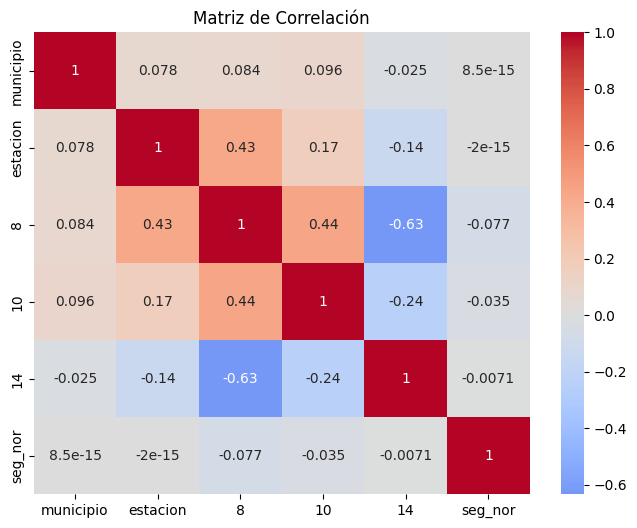

In [260]:
correlation_matrix = df_total.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

In [40]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler


Dividimos los datos en datos de entrenamiento y prueba 

In [275]:
train_dataset = df_total.sample(frac=0.8, random_state=0)
test_dataset = df_total.drop(train_dataset.index)

In [30]:
n = len(df_total)

train_dataset = df_total[0:int(n*0.8)]
test_dataset = df_total[int(n*0.8):]

Datos para predecir un contaminante contando los demás

In [13]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('14')
test_labels = test_features.pop('14')

In [ ]:
train_dataset.describe().transpose()[['mean', 'std']] 

Datos para predecir los tres contaminantes 

In [16]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

col = ['8', '10', '14']
train_labels = train_features['14'].copy()
test_labels = test_features['14'].copy()

train_features = train_features.drop(columns=col)
test_features=test_features.drop(columns=col)



In [12]:
df_total
train_features

,municipio,estacion,ano,mes,dia,hora_num
0,67,1,2018,1,1,1
1,67,1,2018,1,1,2
2,67,1,2018,1,1,3
3,67,1,2018,1,1,4
4,67,1,2018,1,1,5
...,...,...,...,...,...,...
134951,148,4,2020,7,25,24
134952,148,4,2020,7,26,1
134953,148,4,2020,7,26,2
134954,148,4,2020,7,26,3


In [41]:
df_leg = df_dict['(74,7)']
df_leg.describe().transpose()[['mean', 'std']]

,mean,std
municipio,74.000000,0.000000
estacion,7.000000,0.000000
year,2020.726846,1.862692
month,6.295775,3.464381
day,15.725566,8.798250
hora_num,12.500000,6.922248
8,32.142587,26.230249
10,21.111264,19.522238
14,50.920473,33.732141


Capa de normalizacion N(0,1)

In [13]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[  83.41628      4.        2020.411        6.2383294   15.711492
    12.499703 ]]


In [42]:

linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(64, activation='tanh'),
    layers.Dense(100, activation="tanh"),
    layers.Dense(128, activation='tanh'),
    layers.Dense(64, activation='tanh'),
    layers.Dense(30, activation = 'tanh'),
    layers.Dense(1)
])
linear_model.predict(train_features[:10])

NameError: name 'normalizer' is not defined

In [15]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='mean_squared_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=150,
    batch_size=64,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.1)

Epoch 1/150
1898/1898 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 3720.7891 - mean_absolute_error: 51.1793 - mean_squared_error: 3720.7891 - val_loss: 6408.6465 - val_mean_absolute_error: 71.9944 - val_mean_squared_error: 6405.6865
Epoch 2/150
1898/1898 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3122.4734 - mean_absolute_error: 46.3171 - mean_squared_error: 3122.4734 - val_loss: 7168.8843 - val_mean_absolute_error: 77.0926 - val_mean_squared_error: 7165.7461
Epoch 3/150
1898/1898 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2787.9458 - mean_absolute_error: 43.4783 - mean_squared_error: 2787.9458 - val_loss: 7951.4502 - val_mean_absolute_error: 82.0100 - val_mean_squared_error: 7948.1401
Epoch 4/150
1898/1898 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2515.5002 - mean_absolute_error: 40.9943 - mean_squared_error: 2515.5002 - val_loss: 8754.4336 - val_mean_absolute_error: 86.7668 - val_mean_squared_error: 8750.9570
Epoch 5/150
1898/1898 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2297.9805 - mean_abso

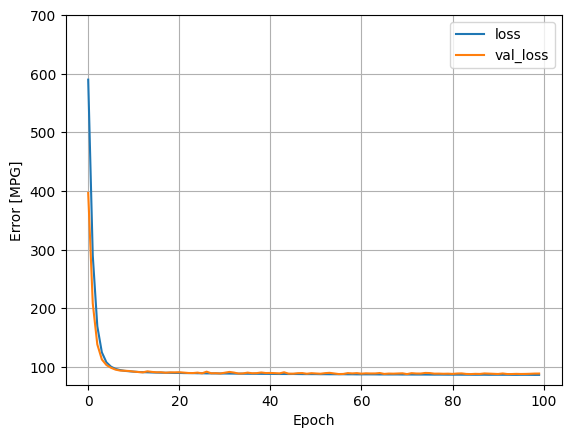

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([70,700])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)
plot_loss(history)

In [11]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU, SimpleRNN, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



est = [(74,7), (148,4), (67,1)]
# Cargar datos de concentración
df_leg = df_dict['(74,7)']
df_torr = df_dict['(148,4)']
df_guad = df_dict['(67,1)']

# Crear las secuencias de datos

"""
def create_seq(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)
"""
def create_seq(data, data_y, seq_length):
    
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data_y[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

def prepara_datos(df, num_cont, window_size, ):
    #Normalizamos los datos de entrenamiento 
    scaler = StandardScaler()
    df_data = df[[f'{num_cont}']].copy()
    df_normal = pd.DataFrame(scaler.fit_transform(df_data), columns=df_data.columns)
   

    # Seleccionar la columna de concentración
    data = df_normal.values
    data_y = df[[f'{num_cont}']].copy().values
    
    """
    # Seleccionar la columna de concentración
    data = df[[f'{num_cont}']].values
    """
 

    #Crear secuencias de datos
    X,Y = create_seq(data, data_y, window_size)
    

    # Dividir los datos en conjuntos de entrenamiento y prueba
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    Y_train, Y_test = Y[:train_size], Y[train_size:]

    return X_train, X_test, Y_train, Y_test

def DNN(window, X_train, Y_train, num_epochs, b_size, val_split):
    model=Sequential()
    #model.add(Dense(units=100, input_dim=window, activation='relu'))

    model.add(Dense(units=100, input_dim=window, activation='tanh'))
    #model.add(Dense(8, activation='relu'))
    #model.add(Dense(units=50, activation='relu'))
    #model.add(Dense(25, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mse', 'mae'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model.fit(X_train, Y_train, epochs=num_epochs, batch_size=b_size, validation_split=val_split, callbacks=[early_stopping])
    return model

def RNN(window_size, X_train, Y_train, num_epochs, b_size, val_split):
    
    # Definir el modelo
    model = Sequential()
    model.add(SimpleRNN(100, activation="tanh", input_shape=(window_size, 1)))
    model.add(Dense(1))

    # Compilar el modelo
    model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['mse', 'mae'])
    
    #Regularización 
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Entrenar el modelo
    model.fit(X_train, Y_train, epochs=num_epochs, batch_size=b_size, validation_split=val_split, callbacks=[early_stopping])

    return model 

def RNN_LSTM(window_size, X_train, Y_train, num_epochs, b_size, val_split):
    
    # Definir el modelo
    model = Sequential()
    model.add(LSTM(100, activation="tanh",input_shape=(window_size, 1)))
    #model.add(Dense(1))
    
    """
    # Segunda capa LSTM
    model.add(LSTM(100, activation="tanh", return_sequences=True))
    model.add(Dropout(0.2))
    
    # Tercera capa LSTM
    model.add(LSTM(50, activation="tanh"))
    model.add(Dropout(0.2))
    """
    model.add(Dense(1))
     
    # Compilar el modelo
    model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['mse', 'mae'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


    # Entrenar el modelo
    model.fit(X_train, Y_train, epochs=num_epochs, batch_size=b_size, validation_split=val_split, callbacks=[early_stopping])

    return model 

def RNN_GRU(window_size, X_train, Y_train, num_epochs, b_size, val_split):
    
    # Definir el modelo
    model = Sequential()
    model.add(GRU(150, activation="tanh", input_shape=(window_size, 1)))
    model.add(Dense(1))

    # Compilar el modelo
    model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['mse', 'mae'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Entrenar el modelo
    model.fit(X_train, Y_train, epochs=num_epochs, batch_size=b_size, validation_split=val_split, callbacks=[early_stopping])

    return model 



def create_model_test(df, num_cont, window_size, num_epochs, b_size, val_split, mod):
    X_train, X_test, Y_train, Y_test = prepara_datos(df, num_cont, window_size)
    model = mod(window_size, X_train, Y_train, num_epochs, b_size, val_split)
    return model, X_test, Y_test


In [18]:
#Modelos para Guadalix de la Sierra 
model_guad_8, X_test_g_8, Y_test_g_8 = create_model_test(df_guad, 8, 3, 150, 32, 0.2, DNN)
model_guad_10, X_test_g_10, Y_test_g_10  = create_model_test(df_guad, 10, 3, 150, 32, 0.2, DNN)
model_guad_14, X_test_g_14, Y_test_g_14  = create_model_test(df_guad, 14, 3, 150, 32, 0.2, DNN)

c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 64.8346 - mae: 5.0204 - mse: 64.8346 - val_loss: 22.7644 - val_mae: 2.9872 - val_mse: 22.6228
Epoch 2/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 25.0413 - mae: 2.9527 - mse: 25.0413 - val_loss: 22.3121 - val_mae: 2.7284 - val_mse: 22.2071
Epoch 3/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 23.8610 - mae: 2.8629 - mse: 23.8610 - val_loss: 22.1814 - val_mae: 2.7326 - val_mse: 22.1116
Epoch 4/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 24.0327 - mae: 2.8801 - mse: 24.0327 - val_loss: 22.0855 - val_mae: 2.7033 - val_mse: 22.0159
Epoch 5/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 23.5892 - mae: 2.8409 - mse: 23.5892 - val_loss: 21.9143 - val_mae: 2.6843 - val_mse: 21.8479
Epoch 6/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 23.9594 - mae: 2.8579 - mse: 23.9594 - val_loss: 21.8881 - val_mae: 2.6693 - val_mse: 21.8304
Epoch 7/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step -

c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1125/1125 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 132.4961 - mae: 6.6615 - mse: 132.4962 - val_loss: 504.7434 - val_mae: 5.0156 - val_mse: 506.2483
Epoch 2/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 41.2890 - mae: 3.7506 - mse: 41.2891 - val_loss: 444.0201 - val_mae: 4.7169 - val_mse: 445.3418
Epoch 3/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 35.2848 - mae: 3.6220 - mse: 35.2848 - val_loss: 403.6899 - val_mae: 4.8420 - val_mse: 404.8875
Epoch 4/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 34.3315 - mae: 3.6112 - mse: 34.3315 - val_loss: 370.3494 - val_mae: 4.5921 - val_mse: 371.4493
Epoch 5/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 30.1812 - mae: 3.5891 - mse: 30.1812 - val_loss: 340.2775 - val_mae: 4.5506 - val_mse: 341.2874
Epoch 6/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 29.1164 - mae: 3.5616 - mse: 29.1164 - val_loss: 315.9411 - val_mae: 4.4771 - val_mse: 316.8786
Epoch 7/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step

c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 1816.5183 - mae: 32.0492 - mse: 1816.5188 - val_loss: 211.4393 - val_mae: 10.1181 - val_mse: 211.7163
Epoch 2/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 172.8624 - mae: 9.1735 - mse: 172.8625 - val_loss: 117.3710 - val_mae: 7.2605 - val_mse: 117.4378
Epoch 3/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 108.9448 - mae: 7.1049 - mse: 108.9448 - val_loss: 100.5379 - val_mae: 6.6446 - val_mse: 100.5508
Epoch 4/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 100.0986 - mae: 6.8488 - mse: 100.0986 - val_loss: 98.5877 - val_mae: 6.7407 - val_mse: 98.5791
Epoch 5/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 96.4692 - mae: 6.6698 - mse: 96.4692 - val_loss: 95.4295 - val_mae: 6.6008 - val_mse: 95.4137
Epoch 6/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 95.5380 - mae: 6.6407 - mse: 95.5380 - val_loss: 98.3955 - val_mae: 6.8691 - val_mse: 98.4027
Epoch 7/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/st

In [19]:
# Evaluar el modelo de Guadalix de la Sierra 
loss_guad_8 = model_guad_8.evaluate(X_test_g_8, Y_test_g_8)
loss_guad_10 = model_guad_10.evaluate(X_test_g_10, Y_test_g_10)
loss_guad_14 = model_guad_14.evaluate(X_test_g_14, Y_test_g_14)

print(f"Test Loss 8: {loss_guad_8}")
print(f"Test Loss 10: {loss_guad_10}")
print(f"Test Loss 14: {loss_guad_14}")

352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 17.8793 - mae: 2.4693 - mse: 17.8794
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 32.9915 - mae: 3.7936 - mse: 32.9918
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 81.1738 - mae: 6.0814 - mse: 81.1738
Test Loss 8: [16.013696670532227, 2.368195056915283, 16.02600860595703]
Test Loss 10: [29.646093368530273, 3.415783643722534, 29.687501907348633]
Test Loss 14: [80.62100219726562, 6.018620491027832, 80.62677764892578]


DNN(3) 100 NEURONAS
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 17.5431 - mae: 2.4490 - mse: 17.5432
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 33.2532 - mae: 3.7156 - mse: 33.2534
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 83.7098 - mae: 6.2006 - mse: 83.7100
Test Loss 8: [15.848474502563477, 2.365659236907959, 15.858933448791504]
Test Loss 10: [30.038536071777344, 3.366487979888916, 30.07952880859375]
Test Loss 14: [83.32794952392578, 6.191246509552002, 83.36847686767578]

RNN(3) 100 NEURONAS
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17.5335 - mae: 2.4177 - mse: 17.5336
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 32.7722 - mae: 3.7748 - mse: 32.7725
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 81.2809 - mae: 6.1596 - mse: 81.2810
Test Loss 8: [15.941622734069824, 2.3350136280059814, 15.953843116760254]
Test Loss 10: [29.716516494750977, 3.4105091094970703, 29.757997512817383]
Test Loss 14: [80.89879608154297, 6.11954927444458, 80.91987609863281]

RNN_LSTM(3) 
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17.5335 - mae: 2.4177 - mse: 17.5336
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 32.7722 - mae: 3.7748 - mse: 32.7725
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 81.2809 - mae: 6.1596 - mse: 81.2810
Test Loss 8: [15.941622734069824, 2.3350136280059814, 15.953843116760254]
Test Loss 10: [29.716516494750977, 3.4105091094970703, 29.757997512817383]
Test Loss 14: [80.89879608154297, 6.11954927444458, 80.91987609863281]

RNN_GRU(3) 100 NEURONAS 
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 17.8793 - mae: 2.4693 - mse: 17.8794
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 32.9915 - mae: 3.7936 - mse: 32.9918
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 81.1738 - mae: 6.0814 - mse: 81.1738
Test Loss 8: [16.013696670532227, 2.368195056915283, 16.02600860595703]
Test Loss 10: [29.646093368530273, 3.415783643722534, 29.687501907348633]
Test Loss 14: [80.62100219726562, 6.018620491027832, 80.62677764892578]

DNN(24) 100 NEURONAS
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.6765 - mae: 2.1631 - mse: 13.6766
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 31.6115 - mae: 3.6212 - mse: 31.6118
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 62.1560 - mae: 5.4438 - mse: 62.1559
Test Loss 8: [12.357009887695312, 2.082223415374756, 12.366024017333984]
Test Loss 10: [28.87836456298828, 3.335787296295166, 28.921907424926758]
Test Loss 14: [62.297176361083984, 5.423507213592529, 62.287109375]
RNN(24) 100 NEURONAS
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 14.2876 - mae: 2.2766 - mse: 14.2877
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 32.1314 - mae: 3.7707 - mse: 32.1317
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 64.2471 - mae: 5.5551 - mse: 64.2469
Test Loss 8: [12.823105812072754, 2.1927006244659424, 12.832639694213867]
Test Loss 10: [29.04602813720703, 3.403721570968628, 29.098047256469727]
Test Loss 14: [64.60433959960938, 5.514688014984131, 64.5594482421875]

RNN_LSTM(24) 100 NEURONAS 
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 13.5040 - mae: 2.1389 - mse: 13.5041
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 30.9619 - mae: 3.5718 - mse: 30.9622
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 60.4615 - mae: 5.3501 - mse: 60.4612
Test Loss 8: [12.149020195007324, 2.059035539627075, 12.16039752960205]
Test Loss 10: [27.734779357910156, 3.2240633964538574, 27.77657699584961]
Test Loss 14: [60.43460464477539, 5.301833629608154, 60.38701248168945]

RNN_GRU(24) 100 NEURONAS
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 13.3529 - mae: 2.1182 - mse: 13.3530
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 31.3462 - mae: 3.5849 - mse: 31.3464
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 60.4840 - mae: 5.3198 - mse: 60.4840
Test Loss 8: [12.157280921936035, 2.042264699935913, 12.168559074401855]
Test Loss 10: [28.2808780670166, 3.2524983882904053, 28.323163986206055]
Test Loss 14: [60.917335510253906, 5.273698329925537, 60.908363342285156]


In [23]:
#Modelos para Leganés
model_leg_8, X_test_l_8, Y_test_l_8 = create_model_test(df_leg, 8, 24, 150, 32, 0.2, RNN_GRU)
model_leg_10, X_test_l_10, Y_test_l_10 = create_model_test(df_leg, 10, 24, 150, 32, 0.2, RNN_GRU)
model_leg_14, X_test_l_14, Y_test_l_14 = create_model_test(df_leg, 14, 24, 150, 32, 0.2, RNN_GRU)


c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 35s 26ms/step - loss: 775.2774 - mae: 19.8147 - mse: 775.2769 - val_loss: 120.6328 - val_mae: 7.7055 - val_mse: 120.9210
Epoch 2/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 28s 25ms/step - loss: 126.8440 - mae: 7.2137 - mse: 126.8441 - val_loss: 87.8257 - val_mae: 6.0062 - val_mse: 88.0808
Epoch 3/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 32s 28ms/step - loss: 94.5079 - mae: 6.1988 - mse: 94.5080 - val_loss: 85.8410 - val_mae: 6.0255 - val_mse: 86.1088
Epoch 4/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 50s 45ms/step - loss: 92.3328 - mae: 6.1183 - mse: 92.3328 - val_loss: 83.7089 - val_mae: 5.8092 - val_mse: 83.9295
Epoch 5/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 49s 44ms/step - loss: 93.4108 - mae: 6.0808 - mse: 93.4107 - val_loss: 82.0133 - val_mae: 5.8112 - val_mse: 82.2734
Epoch 6/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 49s 43ms/step - loss: 88.7234 - mae: 5.9757 - mse: 88.7235 - val_loss: 81.8541 - val_mae: 5.7458 - val_mse: 82.1032
Epoch 7/150
1125/1125 ━━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

In [ ]:
# Evaluar el modelo
loss_leg_8 = model_leg_8.evaluate(X_test_l_8, Y_test_l_8)
loss_leg_10 = model_leg_10.evaluate(X_test_l_10, Y_test_l_10)
loss_leg_14 = model_leg_14.evaluate(X_test_l_14, Y_test_l_14)

print(f"Test Loss 8: {loss_leg_8}")
print(f"Test Loss 10: {loss_leg_10}")
print(f"Test Loss 14: {loss_leg_14}")



DNN(3) 100 NEURONAS 
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 87.8503 - mae: 6.1033 - mse: 87.8509
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.5375 - mae: 2.1055 - mse: 9.5376
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 98.5546 - mae: 6.8902 - mse: 98.5552
Test Loss 8: [85.85559844970703, 6.003325462341309, 85.97052001953125]
Test Loss 10: [11.199685096740723, 2.199730157852173, 11.214578628540039]
Test Loss 14: [93.55801391601562, 6.623091697692871, 93.65955352783203]

RNN(3) 100 NEURONAS 
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 84.4450 - mae: 6.0548 - mse: 84.4456
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.2260 - mae: 1.9942 - mse: 9.2260
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 96.2008 - mae: 6.7480 - mse: 96.2014
Test Loss 8: [83.1380615234375, 5.956618785858154, 83.23963928222656]
Test Loss 10: [10.818990707397461, 2.127671718597412, 10.833881378173828]
Test Loss 14: [91.94145965576172, 6.490957736968994, 92.0487289428711]

RNN_LSTM(3) 100 NEURONAS
Test Loss 8: [82.63236999511719, 5.80098819732666, 82.73275756835938]
Test Loss 10: [10.712474822998047, 2.187814712524414, 10.724699974060059]
Test Loss 14: [91.91896057128906, 6.422314643859863, 92.03445434570312]

RNN_GRU(3) 100 NEURONAS 
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 83.2673 - mae: 5.8864 - mse: 83.2678
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.6942 - mae: 2.0205 - mse: 8.6942
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 96.6122 - mae: 6.8265 - mse: 96.6128
Test Loss 8: [81.85836791992188, 5.790876388549805, 81.95953369140625]
Test Loss 10: [10.42013931274414, 2.1558194160461426, 10.4332857131958]
Test Loss 14: [92.05378723144531, 6.579350471496582, 92.15646362304688]


DNN(24) 100 NEURONAS
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 74.1791 - mae: 5.4793 - mse: 74.1798
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9.2140 - mae: 2.1223 - mse: 9.2141
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 77.4415 - mae: 6.0815 - mse: 77.4419
Test Loss 8: [71.28813934326172, 5.378331184387207, 71.40894317626953]
Test Loss 10: [10.751276969909668, 2.2076520919799805, 10.768694877624512]
Test Loss 14: [72.18605041503906, 5.755092620849609, 72.25773620605469]

RNN(24) 100 NEURONAS
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 72.3800 - mae: 5.4214 - mse: 72.3806
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 9.6291 - mae: 2.0753 - mse: 9.6292
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 80.3437 - mae: 6.2052 - mse: 80.3440
Test Loss 8: [71.26984405517578, 5.349955081939697, 71.37844848632812]
Test Loss 10: [11.275654792785645, 2.226175308227539, 11.295827865600586]
Test Loss 14: [74.7637939453125, 5.885881423950195, 74.82838439941406]

RNN LSTM(24) 100 NEURONAS
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 68.6141 - mae: 5.2837 - mse: 68.6146
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 9.7326 - mae: 2.1620 - mse: 9.7327
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 76.6418 - mae: 5.9939 - mse: 76.6420
Test Loss 8: [67.5677261352539, 5.2278289794921875, 67.6731948852539]
Test Loss 10: [11.181046485900879, 2.2741992473602295, 11.199443817138672]
Test Loss 14: [71.1746597290039, 5.678843975067139, 71.21439361572266]

RNN GRU(24) 100 NEURONAS
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 68.5852 - mae: 5.2759 - mse: 68.5858
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 9.1926 - mae: 1.9813 - mse: 9.1927
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 74.9827 - mae: 5.9554 - mse: 74.9831
Test Loss 8: [67.45165252685547, 5.209061622619629, 67.55088806152344]
Test Loss 10: [10.786667823791504, 2.0674448013305664, 10.805265426635742]
Test Loss 14: [70.42713165283203, 5.665657997131348, 70.50572204589844]



In [28]:
model_torr_8, X_test_t_8, Y_test_t_8 = create_model_test(df_torr, 8, 3, 150, 32, 0.2, RNN_GRU)
model_torr_10, X_test_t_10, Y_test_t_10 = create_model_test(df_torr, 10, 3, 150, 32, 0.2, RNN_GRU)
model_torr_14, X_test_t_14, Y_test_t_14 = create_model_test(df_torr, 14, 3, 150, 32, 0.2, RNN_GRU)

Epoch 1/150


c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1125/1125 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 362.0424 - mae: 12.5788 - mse: 362.0425 - val_loss: 64.2368 - val_mae: 5.2956 - val_mse: 64.3771
Epoch 2/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 89.8784 - mae: 6.0894 - mse: 89.8783 - val_loss: 62.8728 - val_mae: 5.3349 - val_mse: 62.9842
Epoch 3/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 86.0524 - mae: 5.9032 - mse: 86.0524 - val_loss: 62.8952 - val_mae: 5.3768 - val_mse: 63.0136
Epoch 4/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 84.7746 - mae: 5.8798 - mse: 84.7746 - val_loss: 61.2552 - val_mae: 4.9844 - val_mse: 61.3678
Epoch 5/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 82.3364 - mae: 5.8431 - mse: 82.3364 - val_loss: 58.2315 - val_mae: 4.8985 - val_mse: 58.3365
Epoch 6/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 82.5027 - mae: 5.8429 - mse: 82.5027 - val_loss: 57.4778 - val_mae: 4.8269 - val_mse: 57.5892
Epoch 7/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 82.

c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 266.3300 - mae: 9.4606 - mse: 266.3301 - val_loss: 266.4918 - val_mae: 4.1022 - val_mse: 267.2866
Epoch 2/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 58.4199 - mae: 4.2195 - mse: 58.4199 - val_loss: 213.9032 - val_mae: 3.7086 - val_mse: 214.5404
Epoch 3/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 46.7243 - mae: 3.9903 - mse: 46.7244 - val_loss: 185.0204 - val_mae: 3.5653 - val_mse: 185.5713
Epoch 4/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 46.5378 - mae: 4.0058 - mse: 46.5378 - val_loss: 165.4843 - val_mae: 3.5851 - val_mse: 165.9769
Epoch 5/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 46.5499 - mae: 3.9961 - mse: 46.5499 - val_loss: 148.5950 - val_mae: 3.4873 - val_mse: 149.0360
Epoch 6/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 49.0332 - mae: 3.9712 - mse: 49.0332 - val_loss: 134.4849 - val_mae: 3.3980 - val_mse: 134.8831
Epoch 7/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step -

c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 1544.3236 - mae: 28.8114 - mse: 1544.3240 - val_loss: 242.6927 - val_mae: 11.4945 - val_mse: 243.2702
Epoch 2/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 180.1365 - mae: 9.6472 - mse: 180.1365 - val_loss: 133.7326 - val_mae: 7.8090 - val_mse: 134.0039
Epoch 3/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 117.6894 - mae: 7.5797 - mse: 117.6894 - val_loss: 114.9959 - val_mae: 7.5035 - val_mse: 115.1930
Epoch 4/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 111.4483 - mae: 7.2945 - mse: 111.4483 - val_loss: 109.5472 - val_mae: 7.2079 - val_mse: 109.7197
Epoch 5/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 107.3435 - mae: 7.1797 - mse: 107.3436 - val_loss: 106.6800 - val_mae: 7.0369 - val_mse: 106.8427
Epoch 6/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 106.9825 - mae: 7.1792 - mse: 106.9824 - val_loss: 107.3279 - val_mae: 7.1962 - val_mse: 107.4950
Epoch 7/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━

In [29]:
# Evaluar el modelo de Torrejón de Ardoz
loss_torr_8 = model_torr_8.evaluate(X_test_t_8, Y_test_t_8)
loss_torr_10 = model_torr_10.evaluate(X_test_t_10, Y_test_t_10)
loss_torr_14 = model_torr_14.evaluate(X_test_t_14, Y_test_t_14)

print(f"Test Loss 8: {loss_torr_8}")
print(f"Test Loss 10: {loss_torr_10}")
print(f"Test Loss 14: {loss_torr_14}")

352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 55.5360 - mae: 4.8511 - mse: 55.5364
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10.3134 - mae: 2.0867 - mse: 10.3134
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 102.5066 - mae: 7.1085 - mse: 102.5072
Test Loss 8: [54.13479995727539, 4.743683338165283, 54.21220397949219]
Test Loss 10: [12.571667671203613, 2.2789418697357178, 12.576087951660156]
Test Loss 14: [100.908935546875, 6.939528465270996, 101.01778411865234]


DNN(3) 100 NEURONAS
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 56.1179 - mae: 4.9991 - mse: 56.1183
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.6800 - mae: 2.1519 - mse: 10.6801
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 103.1506 - mae: 7.0816 - mse: 103.1513
Test Loss 8: [54.84965515136719, 4.8891072273254395, 54.92226028442383]
Test Loss 10: [13.24984359741211, 2.3559491634368896, 13.256821632385254]
Test Loss 14: [102.01081848144531, 6.936549186706543, 102.12812042236328]

RNN(3) 100 NEURONAS 
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55.3705 - mae: 4.7789 - mse: 55.3709
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 11.1657 - mae: 2.2042 - mse: 11.1657
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 105.2840 - mae: 7.1227 - mse: 105.2846
Test Loss 8: [54.3084602355957, 4.694724082946777, 54.38799285888672]
Test Loss 10: [13.596179008483887, 2.4060778617858887, 13.600802421569824]
Test Loss 14: [103.51685333251953, 6.912387371063232, 103.62413024902344]

RNN_LSTM(3) 100 NEURONAS 
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 55.5497 - mae: 4.8576 - mse: 55.5501
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10.4711 - mae: 2.1558 - mse: 10.4711
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 102.3260 - mae: 7.0563 - mse: 102.3266
Test Loss 8: [54.50950622558594, 4.773031234741211, 54.58770751953125]
Test Loss 10: [12.471543312072754, 2.346558094024658, 12.475689888000488]
Test Loss 14: [100.47252655029297, 6.872214317321777, 100.58133697509766]

RNN_GRU(3) 100 NEURONAS
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 55.5360 - mae: 4.8511 - mse: 55.5364
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10.3134 - mae: 2.0867 - mse: 10.3134
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 102.5066 - mae: 7.1085 - mse: 102.5072
Test Loss 8: [54.13479995727539, 4.743683338165283, 54.21220397949219]
Test Loss 10: [12.571667671203613, 2.2789418697357178, 12.576087951660156]
Test Loss 14: [100.908935546875, 6.939528465270996, 101.01778411865234]



DNN(24) 100 NEURONAS 
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 46.8733 - mae: 4.4899 - mse: 46.8738
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.6911 - mae: 2.2091 - mse: 11.6912
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 80.1706 - mae: 6.2418 - mse: 80.1712
Test Loss 8: [45.14418411254883, 4.38491153717041, 45.226173400878906]
Test Loss 10: [14.5762300491333, 2.415510654449463, 14.587716102600098]
Test Loss 14: [80.30597686767578, 6.1107635498046875, 80.40937805175781]

RNN(24) 100 NEURONAS
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 49.0125 - mae: 4.6365 - mse: 49.0130
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 10.7811 - mae: 2.2068 - mse: 10.7811
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 83.9717 - mae: 6.4183 - mse: 83.9723
Test Loss 8: [47.358585357666016, 4.535187721252441, 47.444766998291016]
Test Loss 10: [14.232047080993652, 2.4143712520599365, 14.23529052734375]
Test Loss 14: [84.53557586669922, 6.31210994720459, 84.63433074951172]

RNN_LSTM(24) 100 NEURONAS
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 46.2405 - mae: 4.3991 - mse: 46.2410
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 10.6551 - mae: 2.1518 - mse: 10.6551
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 77.4127 - mae: 6.1251 - mse: 77.4132
Test Loss 8: [44.84203338623047, 4.306980133056641, 44.92310333251953]
Test Loss 10: [14.043763160705566, 2.359495162963867, 14.050171852111816]
Test Loss 14: [76.79094696044922, 5.938340663909912, 76.88684844970703]

RNN_GRU(24) 100 NEURONAS 
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 46.8854 - mae: 4.4627 - mse: 46.8859
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 11.7083 - mae: 2.2875 - mse: 11.7083
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 77.8711 - mae: 6.1716 - mse: 77.8717
Test Loss 8: [45.37168884277344, 4.358640670776367, 45.4550666809082]
Test Loss 10: [15.068100929260254, 2.45654296875, 15.077798843383789]
Test Loss 14: [77.44457244873047, 5.997723579406738, 77.54349517822266]

In [ ]:
# Gáfica de la predicción 
def prediction_plot(df, cont, test_predict, window_size, title):
    #x_prediction=df.tail(len(test_predict))[train_size:].index[window_size:] 
    x_prediction=df.tail(len(test_predict)).index
    plt.figure(figsize=(12,6))
    plt.plot(df.index, df[cont], label="Observado")
    plt.plot(x_prediction, test_predict, color='orange', label="Predicción")
    plt.tight_layout()
    sns.despine(top=True)
    plt.subplots_adjust(left=0.07)
    plt.ylabel('Dato', size=15)
    plt.xlabel('Fecha', size=15)
    plt.title(title)
    plt.legend(fontsize=15)
    plt.show();


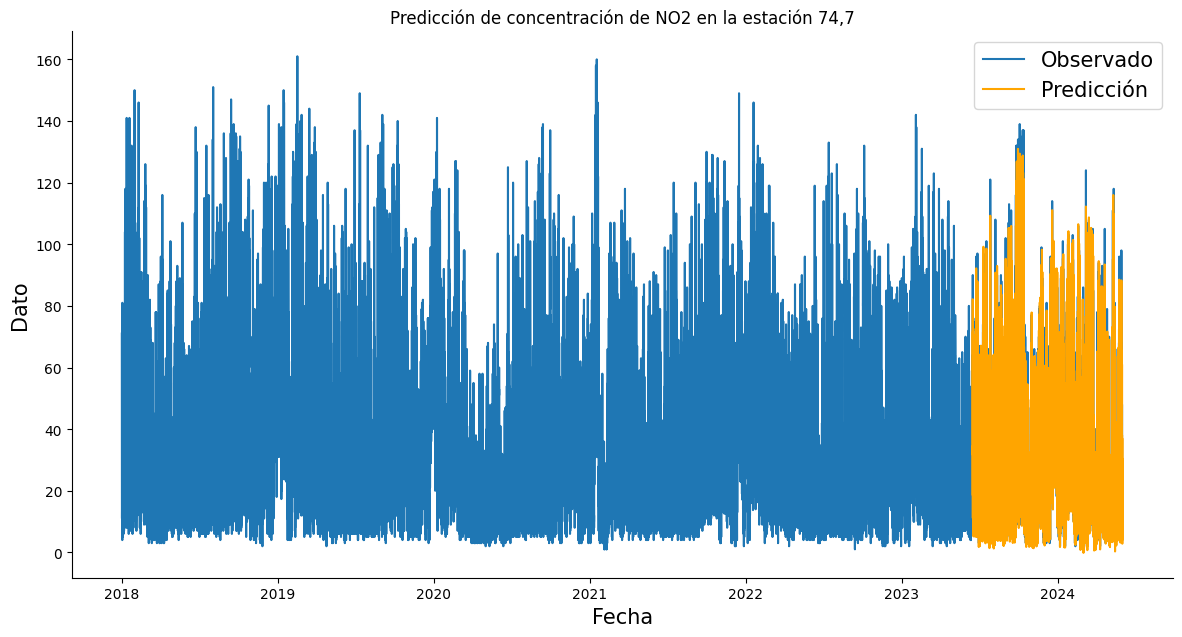

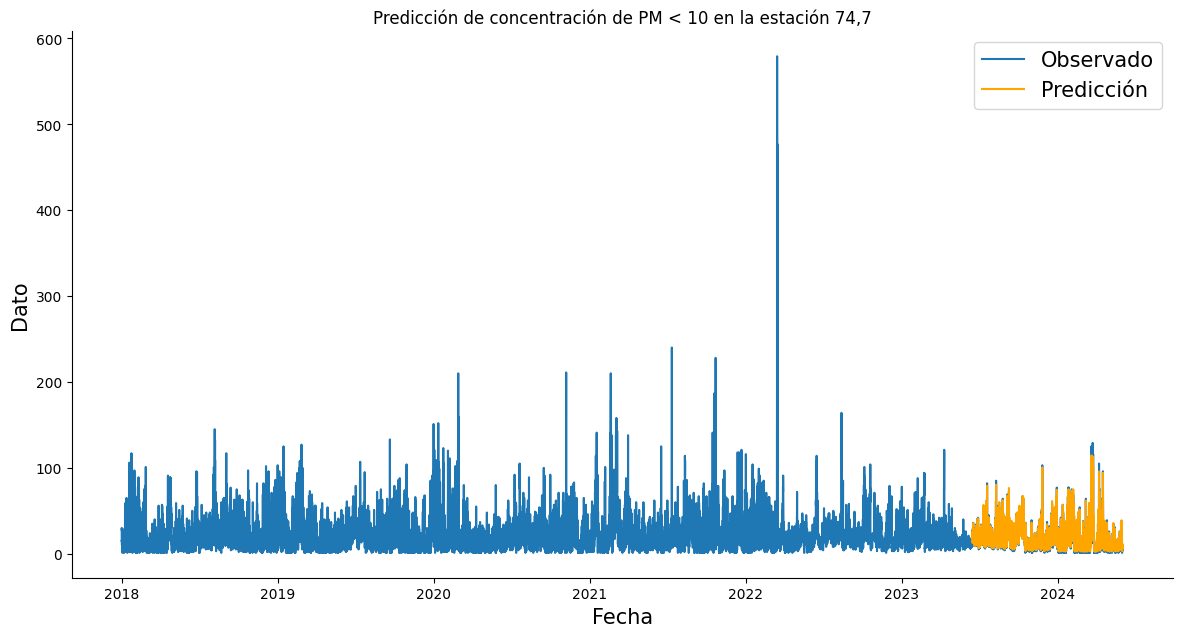

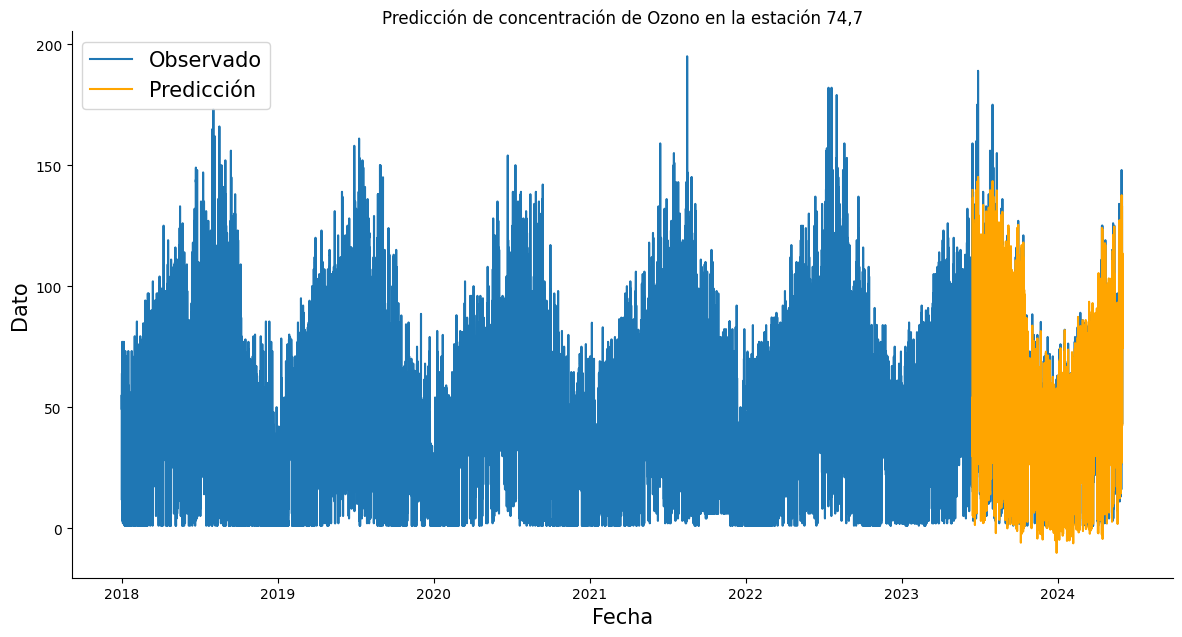

In [ ]:
# Hacer predicciones
p_l_8 = model_leg_8.predict(X_test_l_8)
p_l_10 = model_leg_10.predict(X_test_l_10)
p_l_14 = model_leg_14.predict(X_test_l_14)

prediction_plot(df_leg, '8', p_l_8, 24,'Predicción de concentración de NO2 en la estación 74,7')
prediction_plot(df_leg, '10', p_l_10, 24,'Predicción de concentración de PM < 10 en la estación 74,7')
prediction_plot(df_leg, '14', p_l_14, 24,'Predicción de concentración de Ozono en la estación 74,7')

In [ ]:
#Función que predice n_pred valores dados k valores previos 
def predecir_(model, X_previos, n_pred):
    for i in range(n_pred):
        pred = model.predict(np.array(X_previos[i,:]))
        X_previos = np.append(X_previos, pred)
    return X_previos 